### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

Github Repository URL - https://github.com/thotaomprakash/PGPAIML-UT-Austin-Projects

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#user read_csv functions to import csv files
movies = pd.read_csv("item.csv") #import the movie data
ratings = pd.read_csv("Data.csv") #import the ratings data
users = pd.read_csv("user.csv") #import the users data

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
#info dataframe function
movies.info() #movies datafrme info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [4]:
ratings.info() #ratings dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
users.info() #users info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [6]:
#dataframe shape function
movies.shape #movies shape

(1681, 22)

In [7]:
ratings.shape #ratings shape

(100000, 4)

In [8]:
users.shape #users shape

(943, 5)

In [9]:
#dataframe describe function
movies.describe() #describe movies

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
ratings.describe() #describe ratings

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [11]:
users.describe() #describe users

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [12]:
#find missing values using isnull() function
movies.isnull().sum()#number of missing values in each series

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [13]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [14]:
users.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [17]:
# use sum on the default axis
movies.sum(axis=0)
movies.drop(columns=['release date','movie id','movie title']).sum(axis=0)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [21]:
#hint: use sum on the axis = 1

movies_genre_gt1=movies.drop(columns=['release date','movie id'])
movies_genre_gt1.index=movies_genre_gt1['movie title']
movies_genre_gt1.drop(columns=['movie title'])
movies_genre_gt1.loc[movies_genre_gt1.sum(axis=1)>1].sum(axis=1)

movie title
Toy Story             3
GoldenEye             3
Get Shorty            3
Copycat               3
Twelve Monkeys        2
                     ..
MURDER and murder     3
Tainted               2
Mirage                2
B. Monkey             2
Sliding Doors         2
Length: 849, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [22]:
#drop unknown genre
movies.drop(columns=['unknown'], inplace=True) 

In [25]:
movies.head() #print movies

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [26]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [28]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [29]:
#your answers here

In [30]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


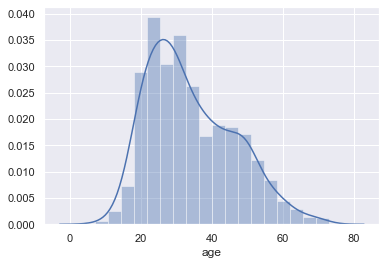

In [31]:
sns.distplot(users['age']);

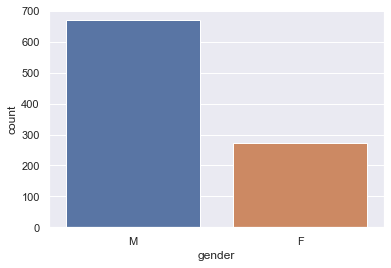

In [32]:
sns.countplot(users['gender'])

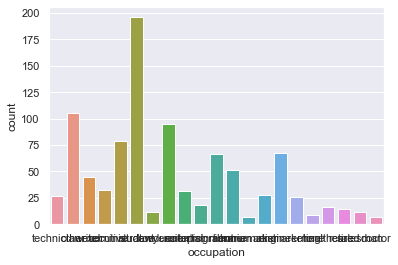

In [33]:
sns.countplot(users['occupation'])

In [35]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


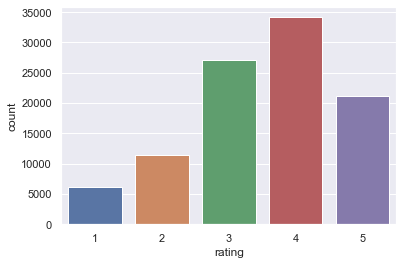

In [36]:
sns.countplot(ratings['rating'])

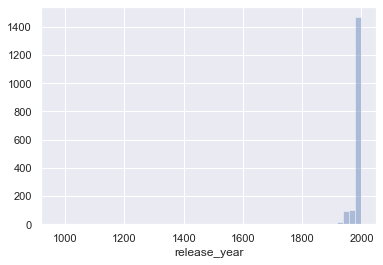

In [40]:
movies.rename(columns={"release date":"release_date"}, inplace=True)
movies['release_year']=movies.release_date.str.slice(7,11)
sns.distplot(movies['release_year'], kde=None)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

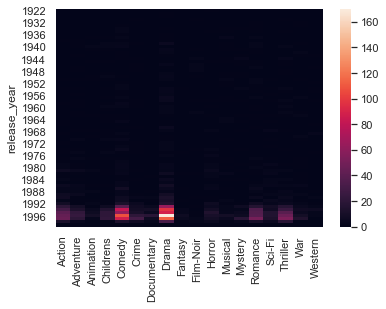

In [44]:
#Your answer here
movies_genre_popularity=movies.drop(columns=['movie id','movie title','release_date'])
movies_genre_popularity.groupby(['release_year']).sum()
sns.heatmap(movies_genre_popularity.groupby(['release_year']).sum())

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [45]:
#your answer here
ratings.head()
# users.head()
movies.head()
movie_titles=movies['movie title']
movie_titles

0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1681, dtype: object

In [46]:
ratings_count=ratings.groupby(['movie id']).count()#ratings group by movie id
ratings_count_gt100=ratings_count.loc[ratings_count['rating']>100] #find movies with ratings greater than 100
ratings_count_gt100
ratings_count

,user id,rating,timestamp
movie id,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86
...,...,...,...
1678,1,1,1
1679,1,1,1
1680,1,1,1


In [47]:
#find average movie ratings
ratings_mean=ratings.groupby(['movie id']).mean()
ratings_mean

,user id,rating,timestamp
movie id,,,
1,477.011062,3.878319,8.828054e+08
2,492.007634,3.206107,8.834174e+08
3,459.133333,3.033333,8.822269e+08
4,469.497608,3.550239,8.827175e+08
5,439.372093,3.302326,8.825882e+08
...,...,...,...
1678,863.000000,1.000000,8.892896e+08
1679,863.000000,3.000000,8.892895e+08
1680,863.000000,2.000000,8.892896e+08


In [49]:
movies_merge1=pd.merge(movies,ratings_count,how='inner',on='movie id')#merge movies and ratings count
movies_merge2=pd.merge(movies_merge1,ratings_mean,how='inner',on='movie id') #merge movies and ratings mean
movies_merge2
#find movies with more than 100 ratings
movies_ratings_count_gt100=movies_merge2.loc[movies_merge2['rating_x']>100] 
#sort the movies in the descending order of average ratings and select top 25
movies_top_25=movies_ratings_count_gt100.sort_values(by=['rating_y'],ascending=False).head(25)
#rename some column names
movies_top_25.rename(columns={"rating_x":"No of ratings","rating_y":"average rating"}, inplace=True)
#print top 25 movies
movies_top_25.reset_index(inplace=True)
movies_top_25[['movie id','movie title','release_year','No of ratings','average rating']]

,movie id,movie title,release_year,No of ratings,average rating
0,408,"Close Shave, A",1996,112,4.491071
1,318,Schindler's List,1993,298,4.466443
2,169,"Wrong Trousers, The",1993,118,4.466102
3,483,Casablanca,1942,243,4.456790
4,64,"Shawshank Redemption, The",1994,283,4.445230
5,603,Rear Window,1954,209,4.387560
6,12,"Usual Suspects, The",1995,267,4.385768
7,50,Star Wars,1977,583,4.358491
8,178,12 Angry Men,1957,125,4.344000
9,134,Citizen Kane,1941,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [81]:
users
ratings.groupby(['user id']).count()
movies.columns
movies_drama=movies.loc[movies['Drama']>0]
movies_SiFi=movies.loc[movies['Sci-Fi']>0]
movies_Romance=movies.loc[movies['Romance']>0]
movies_drama[['movie id','movie title','Drama']]

,movie id,movie title,Drama
3,4,Get Shorty,1
4,5,Copycat,1
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),1
6,7,Twelve Monkeys,1
7,8,Babe,1
...,...,...,...
1674,1676,"War at Home, The",1
1675,1677,Sweet Nothing,1
1676,1678,Mat' i syn,1
1678,1680,Sliding Doors,1


In [82]:
drama_merge_1=pd.merge(movies_drama,ratings,how='inner',on='movie id')
drama_merge_1.drop(columns=['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Fantasy'],inplace=True)
drama_merge_1.drop(columns=['Film-Noir','Horror','Musical','Mystery','Sci-Fi','War','release_date'],inplace=True)
drama_merge_1.drop(columns=['Romance','Thriller','Western'],inplace=True)
drama_merge_1.head()

,movie id,movie title,Drama,release_year,user id,rating,timestamp
0,4,Get Shorty,1,1995,99,5,886519097
1,4,Get Shorty,1,1995,19,4,885412840
2,4,Get Shorty,1,1995,194,4,879521397
3,4,Get Shorty,1,1995,207,4,876198457
4,4,Get Shorty,1,1995,62,4,879374640


In [83]:
#no of ratings by gender for 'Drama' genre
pd.merge(drama_merge_1,users,how='inner',on='user id').groupby(['gender']).count()['rating']

gender
F    11008
M    28887
Name: rating, dtype: int64

In [84]:
movies_SiFi[['movie id','movie title','Sci-Fi']]
drama_merge_1=pd.merge(movies_SiFi,ratings,how='inner',on='movie id')
drama_merge_1.drop(columns=['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Fantasy'],inplace=True)
drama_merge_1.drop(columns=['Film-Noir','Horror','Musical','Mystery','Drama','War','release_date'],inplace=True)
drama_merge_1.drop(columns=['Romance','Thriller','Western'],inplace=True)

In [85]:
#no of ratings by gender for 'SciFi' genre
pd.merge(drama_merge_1,users,how='inner',on='user id').groupby(['gender']).count()['rating']

gender
F     2629
M    10101
Name: rating, dtype: int64

In [86]:
movies_Romance[['movie id','movie title','Sci-Fi']]
drama_merge_1=pd.merge(movies_Romance,ratings,how='inner',on='movie id')
drama_merge_1.drop(columns=['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Fantasy'],inplace=True)
drama_merge_1.drop(columns=['Film-Noir','Horror','Musical','Mystery','Drama','War','release_date'],inplace=True)
drama_merge_1.drop(columns=['Sci-Fi','Thriller','Western'],inplace=True)

In [87]:
#no of ratings by gender for 'Romance' genre
pd.merge(drama_merge_1,users,how='inner',on='user id').groupby(['gender']).count()['rating']

gender
F     5858
M    13603
Name: rating, dtype: int64

#### Conclusion:



It is true that Men watch more drama than women

It is not true that Women watch more Sci-Fi than men

It is true that Men watch more Romance than women